# For a set of csv files, read them in one at a time, perform Guassian Mixture Model 

In [29]:
from sklearn import mixture
from sklearn.preprocessing import scale, robust_scale
from sklearn import decomposition, metrics

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
# Example from http://stackoverflow.com/questions/28438855/mixture-of-gaussians-using-scikit-learn-mixture
'''
os.chdir(os.path.expanduser("~/gmtest"))
data = np.loadtxt(open('foo.csv',"rb"),delimiter=",",skiprows=0)
gmm = mixture.GMM( n_components=14,n_iter=5000, covariance_type='full')
gmm.fit(data)

classes = gmm.predict(data)
pyplot.scatter(data[:,0], data[:,1], c=classes)
pyplot.show()
'''

'\nos.chdir(os.path.expanduser("~/gmtest"))\ndata = np.loadtxt(open(\'foo.csv\',"rb"),delimiter=",",skiprows=0)\ngmm = mixture.GMM( n_components=14,n_iter=5000, covariance_type=\'full\')\ngmm.fit(data)\n\nclasses = gmm.predict(data)\npyplot.scatter(data[:,0], data[:,1], c=classes)\npyplot.show()\n'

In [93]:
directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/'
#directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/screen_357_cell_plate_1_labeled_merged_csvs/'
df = []
#for filename in glob.glob(directory + "LABELLED*.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
for filename in glob.glob(directory + "LABELLED*c03.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
#for filename in glob.glob(directory + "LABELLED*e21.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
    print("Read in" + filename)


Read in/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_c03.csv


In [94]:
my_data=pd.read_csv(filename, index_col=0)
my_data_headers = list(my_data)
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]
# Scale the data columns
my_scaled_data = scale(my_data[my_data_data_headers])
# Make a list where cell_label is converted to numbers for plotting
word_as_num=[]
for word in my_data['cell_label']:
    if word == "unlabelled":
        word_as_num.append("0")
    if word == "blast":
        word_as_num.append("0.5")
    if word == "healthy":
        word_as_num.append("1")


In [100]:
gmm = mixture.GaussianMixture( n_components=3, covariance_type='spherical') # 'full', 'tied', 'diag', 'spherical' 
gmm.fit(my_scaled_data)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [101]:
classes = gmm.predict(my_scaled_data)

In [102]:
unique_labels = np.unique(classes)

In [103]:
#pyplot.scatter(my_scaled_data[:,0], my_scaled_data[:,1], c=classes)
#pyplot.show()

In [104]:
gmm_out = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels)):
    clst_index = my_data['cell_label'][np.where(classes==unique_labels[i])[0]]
    if clst_index.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out.append([unique_labels[i],sum(clst_index=='unlabelled'),
                     sum(clst_index=='blast'),sum(clst_index=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out)

[[0, 3600, 0, 0], [1, 4174, 171, 467], [2, 625, 18, 26]]


## Do another round of GMM

In [69]:
# Convert transformed data into a pandas dataframe
my_scaled_data_pd = pd.DataFrame(my_scaled_data)

In [70]:
my_data_scaled_GMM_clstr3 = my_scaled_data_pd.iloc[np.where(classes==unique_labels[1])[0]]
my_data_scaled_GMM_clstr3_labels = my_data['cell_label'][np.where(classes==unique_labels[1])[0]]

# Need to re-index the pandas dataframe

In [71]:
my_data_scaled_GMM_clstr3 = my_data_scaled_GMM_clstr3.reset_index(drop=True)
my_data_scaled_GMM_clstr3_labels = my_data_scaled_GMM_clstr3_labels.reset_index(drop=True)

In [72]:
#print(my_data_scaled_GMM_clstr10)

In [73]:
#my_data_scaled_GMM_clstr10.shape

In [74]:
gmm1 = mixture.GaussianMixture( n_components=7, covariance_type='diag',) #'full', 'tied', 'diag', 'spherical'
gmm1.fit(my_data_scaled_GMM_clstr3)
classes1 = gmm1.predict(my_data_scaled_GMM_clstr3)
unique_labels1 = np.unique(classes1)

In [75]:
gmm_out1 = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels1)):
    clst_index1 = my_data_scaled_GMM_clstr3_labels[np.where(classes1==unique_labels1[i])[0]]
    #clst_index1 = my_data['cell_label'][np.where(classes1==unique_labels1[i])[0]]
    if clst_index1.isnull().sum() > 0:
        print("Dangit, the indexing is screwed up")
        break
    #print(clst_index1.shape)
    #clst_index = my_data_scaled_PCA_DBSCAN0_labels[np.where(labels==unique_labels[i])[0]]
    if clst_index1.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out1.append([unique_labels1[i],sum(clst_index1=='unlabelled'),
                     sum(clst_index1=='blast'),sum(clst_index1=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out1)

[[0, 436, 0, 232], [1, 286, 159, 1], [2, 1305, 0, 2], [3, 960, 0, 185], [4, 289, 12, 46], [5, 287, 0, 1], [6, 611, 0, 0]]


In [ ]:
# Sanity check is below which should be formalized as a test.

# The output for each cluster from this should block should add up to the cluster it was originally pulled from, so
## sum up element 1, 2 and 3 and make sure that is the same as the cluster you subsetted from

# Note that I need to re-do the indexing if I want to output any of these clusters

# Perform PCA and then do Guassian mixture modelling

In [340]:
#my_scaled_data = robust_scale(my_data[my_data_data_headers])
my_scaled_data = scale(my_data[my_data_data_headers])

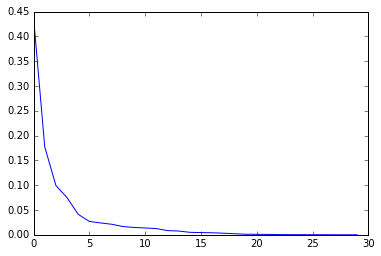

In [341]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)
var=pca.explained_variance_ratio_
plt.plot(var)

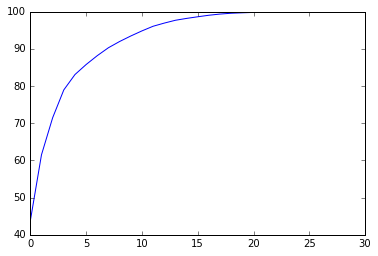

In [342]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [343]:
#### Based on the above transform the data
pca = decomposition.PCA(n_components = 10)
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

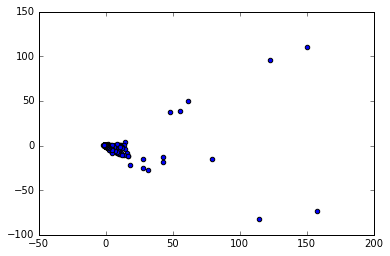

In [344]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xlim(0,20)
plt.show()
#plt.xscale("log")
#plt.yscale("log")
#plt.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])

# Do GMM 

In [353]:
gmm = mixture.GaussianMixture( n_components=14, covariance_type='full') #'full', 'tied', 'diag', 'spherical'
gmm.fit(my_scaled_data_transformed)
classes = gmm.predict(my_scaled_data_transformed)

In [354]:
unique_labels = np.unique(classes)

In [355]:
#pyplot.scatter(my_scaled_data_transformed[:,0], my_scaled_data_transformed[:,1], c=classes)
#pyplot.show()

In [356]:
gmm_out = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels)):
    clst_index = my_data['cell_label'][np.where(classes==unique_labels[i])[0]]
    if clst_index.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out.append([unique_labels[i],sum(clst_index=='unlabelled'),
                     sum(clst_index=='blast'),sum(clst_index=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out)

[[0, 3293, 6, 180], [1, 3, 0, 0], [2, 2, 0, 0], [3, 2, 0, 0], [4, 32, 0, 0], [5, 1, 0, 0], [6, 246, 1, 6], [7, 2834, 0, 0], [8, 4, 0, 0], [9, 1, 0, 0], [10, 81, 6, 0], [11, 636, 0, 0], [12, 862, 176, 298], [13, 402, 0, 9]]


## Do another round of GMM

In [21]:
# Convert transformed data into a pandas dataframe
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [24]:
my_data_scaled_GMM_clstr10 = my_scaled_data_transformed_pd.iloc[np.where(classes==unique_labels[11])[0]]
my_data_scaled_GMM_clstr10_labels = my_data['cell_label'][np.where(classes==unique_labels[11])[0]]

# Need to re-index the pandas dataframe

In [25]:
my_data_scaled_GMM_clstr10 = my_data_scaled_GMM_clstr10.reset_index(drop=True)
my_data_scaled_GMM_clstr10_labels = my_data_scaled_GMM_clstr10_labels.reset_index(drop=True)

In [208]:
#print(my_data_scaled_GMM_clstr10)

In [209]:
#my_data_scaled_GMM_clstr10.shape

(1102, 10)

In [30]:
gmm1 = mixture.GaussianMixture( n_components=3, covariance_type='full') #'full', 'tied', 'diag', 'spherical'
gmm1.fit(my_data_scaled_GMM_clstr10)
classes1 = gmm1.predict(my_data_scaled_GMM_clstr10)
unique_labels1 = np.unique(classes1)

In [31]:
gmm_out1 = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels1)):
    clst_index1 = my_data_scaled_GMM_clstr10_labels[np.where(classes1==unique_labels1[i])[0]]
    #clst_index1 = my_data['cell_label'][np.where(classes1==unique_labels1[i])[0]]
    if clst_index1.isnull().sum() > 0:
        print("Dangit, the indexing is screwed up")
        break
    #print(clst_index1.shape)
    #clst_index = my_data_scaled_PCA_DBSCAN0_labels[np.where(labels==unique_labels[i])[0]]
    if clst_index1.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out1.append([unique_labels1[i],sum(clst_index1=='unlabelled'),
                     sum(clst_index1=='blast'),sum(clst_index1=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out1)

[[0, 109, 40, 0], [1, 5, 0, 0], [2, 319, 123, 14]]


In [ ]:
# Sanity check is below which should be formalized as a test.

# The output for each cluster from this should block should add up to the cluster it was originally pulled from, so
## sum up element 1, 2 and 3 and make sure that is the same as the cluster you subsetted from

# Note that I need to re-do the indexing if I want to output any of these clusters

In [5]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import decomposition, metrics
from sklearn.preprocessing import scale, robust_scale
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [7]:
directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/'
#directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/screen_357_cell_plate_1_labeled_merged_csvs/'
df = []
do_boxplots = 0; # binary, 1 indicates that boxplots should be made
#for filename in glob.glob(directory + "LABELLED*.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
for filename in glob.glob(directory + "LABELLED*n09*.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
    print("Read in" + filename)
    # Set some variables equal to "None" so that I don't have surprises later
    my_data=None; my_data_headers=None; meta_headers=None; my_data_data_headers=None
    my_scaled_data = None; word_as_num = None; tsne_out_mink = None; labels = None
    
    my_data=pd.read_csv(filename, index_col=0)
    my_data_headers = list(my_data)
    meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]
    my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]
    # Scale the data columns
    my_scaled_data = scale(my_data[my_data_data_headers])
    # Make a list where cell_label is converted to numbers for plotting
    word_as_num=[]
    for word in my_data['cell_label']:
        if word == "unlabelled":
            word_as_num.append("0")
        if word == "blast":
            word_as_num.append("0.5")
        if word == "healthy":
            word_as_num.append("1")
    lr = 3000 # Set the learning rate for t-SNE
    # Perform t-SNE
    print("Starting t-SNE calculation")
    tsne_out_mink = TSNE(metric='minkowski', learning_rate=lr, n_iter=lr, random_state=11).fit_transform(my_scaled_data)
    print("Done with t-SNE calculation")
    # Plot and save the output
    plt.figure(figsize=(20, 10))
    plt.gcf().clear()
    plt.subplot(121)
    plt.scatter(tsne_out_mink[:, 0], tsne_out_mink[:, 1], c= word_as_num, cmap=plt.cm.viridis)
    plt.savefig(filename + "__tsne.png")
    plt.close()
    # Do DBSCAN on the tSNEd data
    print("Starting DBSCAN")
    dbsc = DBSCAN(eps = .6,min_samples=10).fit(tsne_out_mink)
    labels = dbsc.labels_
    core_samples = np.zeros_like(labels, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    unique_labels = np.unique(labels)
    print("Plotting DBSCAN")
    # Plot the DBSCAN results
    plt.figure(figsize=(20, 10))
    plt.gcf().clear()
    plt.subplot(121)
    col = np.linspace(0,1,len(unique_labels))
    for i in xrange(len(unique_labels)):
        plt.plot(tsne_out_mink[np.where(labels==unique_labels[i])[0], 0], 
             tsne_out_mink[np.where(labels==unique_labels[i])[0], 1],
                #'o', mfc=plt.cm.viridis(col[i]), label=unique_labels[i])
                'o', mfc=plt.cm.nipy_spectral(col[i]), label=unique_labels[i])
                #'o', mfc=plt.cm.prism(col[i]), label=unique_labels[i])
                #'o', mfc=plt.cm.flag(col[i]), label=unique_labels[i])
    plt.legend(loc='best', frameon=False)
    plt.savefig(filename + "__DBSCAN_of_tsne.png")
    plt.close()
    # Summarize the combination of tSNE and DBSCAN results
    tsne_db = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
    ## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
    for i in xrange(len(unique_labels)):
        clst_index = my_data['cell_label'][np.where(labels==unique_labels[i])[0]]
        if clst_index.empty == True:
            print("Cluster index and original data don't line up right. STOP AND FIX")
            break
        tsne_db.append([unique_labels[i],sum(clst_index=='unlabelled'),
                         sum(clst_index=='blast'),sum(clst_index=='healthy')])
    print(tsne_db)
    # Prepare to plot the results as grouped barplots
    print("Plotting grouped barplots")
    tsne_db_df = pd.DataFrame(tsne_db,columns=["Cluster Label","Unlabelled","Blast","Healthy"])
    tsne_db_df_melted = pd.melt(tsne_db_df,value_vars=["Unlabelled","Blast","Healthy"],id_vars="Cluster Label")
    plt.gcf().clear()
    ax = sns.barplot(hue="variable",y="value",x="Cluster Label",data=tsne_db_df_melted,log='y')
    plt.savefig(filename + '__barplot.png')
    plt.close()
    if do_boxplots == 1:
        # For each cluster plot boxplots of each feature
        print("Starting boxplots plotting")
        for i in xrange(len(unique_labels)):
            clst_index = my_data.ix[np.where(labels==unique_labels[i])[0],my_data_data_headers]
            clst_index_scaled = my_scaled_data[np.where(labels==unique_labels[i])[0],]
            # Plot the unscaled data
            locations = range(1,(len(my_data_data_headers)+1))
            plt.figure()
            plt.gcf().clear()
            plt.boxplot(clst_index.as_matrix(),positions=locations)
            plt.title("Cluster number " + str(unique_labels[i]))
            plt.ylabel('A.U.')
            plt.xticks(locations, my_data_data_headers,rotation='vertical')
            #plt.yscale('log')
            percs = (clst_index.describe(percentiles=[0.1,0.5,0.9]))
            plt.ylim(percs.iloc[4].min(),percs.iloc[6].max())
            #plt.show()
            plt.savefig(filename + "__boxplots_of_cluster" +str(unique_labels[i])+".png")
            plt.close()
            locations = range(1,(len(my_data_data_headers)+1))
            # Plot the scaled data
            plt.figure()
            plt.gcf().clear()
            plt.boxplot(clst_index_scaled,positions=locations)
            plt.title("Cluster number " + str(unique_labels[i]))
            plt.ylabel('A.U.')
            plt.xticks(locations, my_data_data_headers,rotation='vertical')
            #plt.yscale('log')
            percs_scaled = pd.DataFrame(clst_index_scaled).describe(percentiles=[0.1,0.5,0.9])
            plt.ylim(percs_scaled.iloc[4].min(),percs_scaled.iloc[6].max())
            plt.savefig(filename + "__scaled_boxplots_of_cluster" +str(unique_labels[i])+".png")
            plt.close()
    print("Done with " + filename)

Read in/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/screen_357_cell_plate_1_labeled_merged_csvs/LABELLED_by_cell_type_screen_357_cell_plate_1_labeled_merged_screen_357_cell_plate_1_labeled_merged_well_n09.csv
Starting t-SNE calculation
Done with t-SNE calculation
Starting DBSCAN
Plotting DBSCAN
[[-1, 46, 0, 0], [0, 13, 0, 0], [1, 425, 0, 0], [2, 10054, 32, 0], [3, 64, 0, 0], [4, 326, 513, 0], [5, 343, 0, 0], [6, 421, 0, 0], [7, 105, 0, 0], [8, 200, 0, 0], [9, 42, 0, 0], [10, 108, 0, 0], [11, 47, 297, 0], [12, 31, 0, 0], [13, 187, 0, 0], [14, 77, 0, 0], [15, 55, 91, 0], [16, 165, 0, 0], [17, 253, 0, 0], [18, 71, 0, 0], [19, 40, 0, 0], [20, 13, 0, 0], [21, 40, 0, 0], [22, 16, 93, 0], [23, 28, 28, 0], [24, 7, 12, 0], [25, 87, 0, 0], [26, 20, 0, 0], [27, 11, 0, 0], [28, 26, 0, 0]]
Plotting grouped barplots


ValueError: zero-size array to reduction operation minimum which has no identity

# Add the following code to the above 

In [ ]:
#### I started to work on this, but didn't finish. Psuedo code is mostly done.
'''
#### Export the labelled populations of a well
# Find the fcs file that matches the csv file. 
## First get rid of the .csv, then get rid of the path and the LABELLED,
## now add the path back to the core name identified above, check that 
## it only matches one file, print matches for user to verify
output_name = filename.split(".csv")[0]
filename_fcs = 
for i in xrange(len(unique_labels)):
    fcs_file = FCSParser(path)
    #cluster_data = my_data_keepers.iloc[np.where(labels==unique_labels[i])[0]].astype('float')
    #new_fcs_file = fcs_file.clone(data=cluster_data.as_matrix().astype('float'))
    new_fcs_file = fcs_file.clone(data= fcs_file.data[np.where(labels==unique_labels[i])[0]].astype('float'))
    new_fcs_file.annotation['cluster_label'] = unique_labels[i]
    #new_fcs_file.write_to_file("/Users/tswenson/Documents/Joels/TEST.fcs")
    new_fcs_file.write_to_file(output_name + '__cluster_' + str(unique_labels[i])\
                               + '_exported_'\
                               + datetime.datetime.now().strftime('%Y.%m.%d %I.%M.%S')\
                               + '.fcs')
'''

In [ ]:
'''
# Export Well C3 or my_data
path = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/training_set/screen_357_cell_plate_1_well_C3_original.fcs'
output_name = path.split(".fcs")[0]
for i in xrange(len(unique_labels)):
    fcs_file = FCSParser(path)
    #cluster_data = my_data_keepers.iloc[np.where(labels==unique_labels[i])[0]].astype('float')
    #new_fcs_file = fcs_file.clone(data=cluster_data.as_matrix().astype('float'))
    new_fcs_file = fcs_file.clone(data= fcs_file.data[np.where(labels==unique_labels[i])[0]].astype('float'))
    new_fcs_file.annotation['cluster_label'] = unique_labels[i]
    #new_fcs_file.write_to_file("/Users/tswenson/Documents/Joels/TEST.fcs")
    new_fcs_file.write_to_file(output_name + '__cluster_' + str(unique_labels[i])\
                               + '_exported_'\
                               + datetime.datetime.now().strftime('%Y.%m.%d %I.%M.%S')\
                               + '.fcs')
'''

In [7]:
### Only plot clusters with more than 50 events
tsne_db_df_50 = tsne_db_df[tsne_db_df.sum(axis=1)>110]
print(len(tsne_db_df_50))
tsne_db_df_50_melted = pd.melt(tsne_db_df_50,value_vars=["Unlabelled","Blast","Healthy"],id_vars="Cluster Label")
ax = sns.barplot(hue="variable",y="value",x="Cluster Label",data=tsne_db_df_50_melted,log='y')
plt.savefig('e21_largeR_clstrs_only__barplot.png')
plt.close()


10
